# Data Pre-processing

## 1. Introduction

The objective of this project is to develop a **machine learning model** capable of predicting the **quality of welds on steel materials**. Reliable weld quality assessment is a key challenge in modern manufacturing, with direct implications for **safety**, **cost optimization**, and **production efficiency**. Given that the welding industry represents a **multi-billion-euro sector**, improving prediction accuracy can yield substantial **economic and operational benefits**.

The dataset used in this work originates from the *Department of Materials Science and Metallurgy* at the **University of Cambridge, U.K.** It contains experimental data related to various **welding parameters** and **material characteristics**.  

The following sections describe the **methodology** applied to explore, clean, and pre-process these data before proceeding to model development.

> **IMPORTANT**
> See the utils_pre_processing.py file for all the functions details. Here only the pipeline is given.

> **!!** Check the preprocess_data folder to see the results of the pre-processing

## 2. Setup

In [67]:
# All the imports

import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pathlib import Path

sys.path.append(os.path.dirname(os.path.abspath("__file__")))

In [68]:
from utils_pre_processing import *

In [69]:
## Formatting of the columns' names

unprocessed_df = import_data(r"welddb/welddb.data")

# quick overview
print("Shape (rows, cols):", unprocessed_df.shape)
display(unprocessed_df.head())

Data imported successfully from welddb/welddb.data
Shape (rows, cols): (1652, 43)


,carbon_concentration_weight,silicon_concentration_weight,manganese_concentration_weight,sulphur_concentration_weight,phosphorus_concentration_weight,nickel_concentration_weight,chromium_concentration_weight,molybdenum_concentration_weight,vanadium_concentration_weight,copper_concentration_weight,...,reduction_of_area_percent,charpy_temperature_c,charpy_impact_toughness_j,hardness_kgmm2,fifty_percent_fatt,primary_ferrite_percent,ferrite_with_second_phase_percent,acicular_ferrite_percent,martensite_percent,ferrite_with_carbide_aggregate_percent
0,0.037,0.30,0.65,0.008,0.012,0,None,None,None,None,...,80.6,None,None,None,None,None,None,None,None,None
1,0.037,0.30,0.65,0.008,0.012,0,None,None,None,None,...,None,-28,100,None,None,None,None,None,None,None
2,0.037,0.30,0.65,0.008,0.012,0,None,None,None,None,...,80.6,-38,100,None,None,None,None,None,None,None
3,0.037,0.31,1.03,0.007,0.014,0,None,None,None,None,...,80.6,None,None,None,None,None,None,None,None,None
4,0.037,0.31,1.03,0.007,0.014,0,None,None,None,None,...,None,-48,100,None,None,32,28,40,0,0


## 3. Initial Data Cleaning

This stage focuses on straightforward corrections and transformations. Each step follows a clear workflow:
a. Detect issues through targeted analysis.
b. Apply corrective actions accordingly (e.g., type conversions, handling of abnormal or inconsistent values).

### a. Brief overview of the Data

In [70]:
## Describe, infos, head, tail, shape, dtypes, unique values, missing values etc.

# quick overview
print("Shape (rows, cols):", unprocessed_df.shape)
display(unprocessed_df.head())

unprocessed_df.info()
unprocessed_df.describe()

Shape (rows, cols): (1652, 43)


,carbon_concentration_weight,silicon_concentration_weight,manganese_concentration_weight,sulphur_concentration_weight,phosphorus_concentration_weight,nickel_concentration_weight,chromium_concentration_weight,molybdenum_concentration_weight,vanadium_concentration_weight,copper_concentration_weight,...,reduction_of_area_percent,charpy_temperature_c,charpy_impact_toughness_j,hardness_kgmm2,fifty_percent_fatt,primary_ferrite_percent,ferrite_with_second_phase_percent,acicular_ferrite_percent,martensite_percent,ferrite_with_carbide_aggregate_percent
0,0.037,0.30,0.65,0.008,0.012,0,None,None,None,None,...,80.6,None,None,None,None,None,None,None,None,None
1,0.037,0.30,0.65,0.008,0.012,0,None,None,None,None,...,None,-28,100,None,None,None,None,None,None,None
2,0.037,0.30,0.65,0.008,0.012,0,None,None,None,None,...,80.6,-38,100,None,None,None,None,None,None,None
3,0.037,0.31,1.03,0.007,0.014,0,None,None,None,None,...,80.6,None,None,None,None,None,None,None,None,None
4,0.037,0.31,1.03,0.007,0.014,0,None,None,None,None,...,None,-48,100,None,None,32,28,40,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   carbon_concentration_weight             1652 non-null   object
 1   silicon_concentration_weight            1652 non-null   object
 2   manganese_concentration_weight          1652 non-null   object
 3   sulphur_concentration_weight            1648 non-null   object
 4   phosphorus_concentration_weight         1642 non-null   object
 5   nickel_concentration_weight             697 non-null    object
 6   chromium_concentration_weight           784 non-null    object
 7   molybdenum_concentration_weight         793 non-null    object
 8   vanadium_concentration_weight           928 non-null    object
 9   copper_concentration_weight             578 non-null    object
 10  cobalt_concentration_weight             129 non-null    object
 11  tung

,carbon_concentration_weight,silicon_concentration_weight,manganese_concentration_weight,sulphur_concentration_weight,phosphorus_concentration_weight,nickel_concentration_weight,chromium_concentration_weight,molybdenum_concentration_weight,vanadium_concentration_weight,copper_concentration_weight,...,reduction_of_area_percent,charpy_temperature_c,charpy_impact_toughness_j,hardness_kgmm2,fifty_percent_fatt,primary_ferrite_percent,ferrite_with_second_phase_percent,acicular_ferrite_percent,martensite_percent,ferrite_with_carbide_aggregate_percent
count,1652,1652,1652,1648,1642,697,784,793,928,578,...,705,879,879,138,31,98,90,90,89,89
unique,89,70,153,36,37,107,137,85,82,77,...,135,138,167,96,20,38,46,50,2,8
top,0.076,0.33,1.36,0.007,0.008,0.00,0.00,0.00,<0.0005,0.00,...,77.0,-20,100,226,-10,19,9,72,0,0
freq,86,135,65,403,214,120,120,120,266,120,...,47,76,356,5,5,10,5,4,88,78


In [71]:
processed_df = safe_numeric_conversion(unprocessed_df)

# Display summary of resulting dtypes
print("\n=== Conversion Summary ===")
display(processed_df.dtypes.value_counts())

✅ Converted 'carbon_concentration_weight' to numeric.
✅ Converted 'silicon_concentration_weight' to numeric.
✅ Converted 'manganese_concentration_weight' to numeric.
⚠️  Kept 'sulphur_concentration_weight' as non-numeric (contains non-convertible values).
✅ Converted 'phosphorus_concentration_weight' to numeric.
✅ Converted 'nickel_concentration_weight' to numeric.
✅ Converted 'chromium_concentration_weight' to numeric.
⚠️  Kept 'molybdenum_concentration_weight' as non-numeric (contains non-convertible values).
⚠️  Kept 'vanadium_concentration_weight' as non-numeric (contains non-convertible values).
⚠️  Kept 'copper_concentration_weight' as non-numeric (contains non-convertible values).
⚠️  Kept 'cobalt_concentration_weight' as non-numeric (contains non-convertible values).
⚠️  Kept 'tungsten_concentration_weight' as non-numeric (contains non-convertible values).
✅ Converted 'oxygen_concentration_ppm' to numeric.
⚠️  Kept 'titanium_concentration_ppm' as non-numeric (contains non-conve

float64    23
object     20
Name: count, dtype: int64

### b. Column specific treatment

In [72]:
# print the problematic columns to show how they must be handled

#Displays the columns that could not be converted to numeric to define a strategy for them

object_cols = processed_df.select_dtypes(include=['object']).columns
for col in object_cols:
    uniques = processed_df[col].unique()
    # replace actual None with a readable string for display
    uniques_display = [(None if (isinstance(x, float) and np.isnan(x)) else x) for x in uniques]
    print(f"{col} ({len(pd.unique(processed_df[col].dropna()))} valeurs uniques sans None):")
    print(uniques_display)
    print("-" * 80)


sulphur_concentration_weight (36 valeurs uniques sans None):
['0.008', '0.007', '0.006', '0.009', '0.005', '0.004', '0.010', '0.013', '0.011', '0.002', '0.003', '0.016', '0.015', '0.014', '0.012', '0.027', '0.024', '0.025', '0.036', '0.017', '0.021', '0.023', '0.022', '0.020', '0.018', '0.026', '0.028', '0.032', '0.029', '0.030', '0.019', '0.02', '<0.002', '0.001', None, '0.01', '0.14']
--------------------------------------------------------------------------------
molybdenum_concentration_weight (85 valeurs uniques sans None):
[None, '1.00', '1.01', '1.04', '1.03', '0.34', '0.35', '0.98', '0.96', '0.99', '0.91', '0.84', '0.97', '0.01', '0.32', '0.51', '0.54', '0.23', '0.24', '0.27', '0.26', '0.28', '0.29', '0.31', '0.37', '0', '0.02', '0.008', '0.5', '0.03', '0.43', '0.44', '0.48', '<0.01', '0.04', '0.003', '0.005', '0.009', '0.011', '0.17', '0.15', '0.12', '0.125', '0.145', '0.14', '0.185', '0.110', '0.188', '0.006', '0.30', '0.025', '0.010', '0.18', '0.22', '0.39', '0.022', '0.016'

> **Intervals** : 
> - some columns (i.e. interpass_temperature_c) contain intervals [number1,number2]. We keep the average value.
> - some columns contains *<Value*.  It is replaced by *Value / 2*

In [73]:
processed_df = handle_intervals(processed_df)
print("\n=== After Handling Intervals ===")
processed_df = safe_numeric_conversion(processed_df)


=== After Handling Intervals ===
✅ Converted 'carbon_concentration_weight' to numeric.
✅ Converted 'silicon_concentration_weight' to numeric.
✅ Converted 'manganese_concentration_weight' to numeric.
✅ Converted 'sulphur_concentration_weight' to numeric.
✅ Converted 'phosphorus_concentration_weight' to numeric.
✅ Converted 'nickel_concentration_weight' to numeric.
✅ Converted 'chromium_concentration_weight' to numeric.
✅ Converted 'molybdenum_concentration_weight' to numeric.
✅ Converted 'vanadium_concentration_weight' to numeric.
✅ Converted 'copper_concentration_weight' to numeric.
✅ Converted 'cobalt_concentration_weight' to numeric.
✅ Converted 'tungsten_concentration_weight' to numeric.
✅ Converted 'oxygen_concentration_ppm' to numeric.
✅ Converted 'titanium_concentration_ppm' to numeric.
⚠️  Kept 'nitrogen_concentration_ppm' as non-numeric (contains non-convertible values).
✅ Converted 'aluminium_concentration_ppm' to numeric.
✅ Converted 'boron_concentration_ppm' to numeric.
✅ C

/Users/karinamusina/githubrepos/cs/weld-quality-prediction/utils_pre_processing.py:95: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_df = df.applymap(format_cell)


> **nitrogen_concentration_ppm** : contains value such as "66totndres".  If the value in the nitrogen column is a string, it converts it to a numeric value and handles any conversion errors by setting invalid parsing to NaN. Only a small number of lines are concerned.

In [74]:
processed_df = handle_nitrogen(processed_df, 'nitrogen_concentration_ppm')
print("\n=== After Handling Nitrogen ===")
processed_df = safe_numeric_conversion(processed_df)


=== After Handling Nitrogen ===
✅ Converted 'carbon_concentration_weight' to numeric.
✅ Converted 'silicon_concentration_weight' to numeric.
✅ Converted 'manganese_concentration_weight' to numeric.
✅ Converted 'sulphur_concentration_weight' to numeric.
✅ Converted 'phosphorus_concentration_weight' to numeric.
✅ Converted 'nickel_concentration_weight' to numeric.
✅ Converted 'chromium_concentration_weight' to numeric.
✅ Converted 'molybdenum_concentration_weight' to numeric.
✅ Converted 'vanadium_concentration_weight' to numeric.
✅ Converted 'copper_concentration_weight' to numeric.
✅ Converted 'cobalt_concentration_weight' to numeric.
✅ Converted 'tungsten_concentration_weight' to numeric.
✅ Converted 'oxygen_concentration_ppm' to numeric.
✅ Converted 'titanium_concentration_ppm' to numeric.
✅ Converted 'nitrogen_concentration_ppm' to numeric.
✅ Converted 'aluminium_concentration_ppm' to numeric.
✅ Converted 'boron_concentration_ppm' to numeric.
✅ Converted 'niobium_concentration_ppm'

>**hardness_kgmm2** :
>This column contains data such as : 158(Hv30). It is handled as follow:
> - We only keep the first number in this column
> - We create a second column called *hardness_kgmm2_flag* containing the value after Hv.


In [75]:
processed_df = handle_hardness(processed_df)
print("\n=== After Handling Hardness ===")
processed_df = safe_numeric_conversion(processed_df)


# Display unique values from hardness_kgmm2_flag
unique_flags = (processed_df['hardness_kgmm2_flag'].dropna().unique())
unique_flags = sorted(unique_flags)  # sort the values
print("Unique hardness_kgmm2_flag values:", unique_flags)
             


=== After Handling Hardness ===
✅ Converted 'carbon_concentration_weight' to numeric.
✅ Converted 'silicon_concentration_weight' to numeric.
✅ Converted 'manganese_concentration_weight' to numeric.
✅ Converted 'sulphur_concentration_weight' to numeric.
✅ Converted 'phosphorus_concentration_weight' to numeric.
✅ Converted 'nickel_concentration_weight' to numeric.
✅ Converted 'chromium_concentration_weight' to numeric.
✅ Converted 'molybdenum_concentration_weight' to numeric.
✅ Converted 'vanadium_concentration_weight' to numeric.
✅ Converted 'copper_concentration_weight' to numeric.
✅ Converted 'cobalt_concentration_weight' to numeric.
✅ Converted 'tungsten_concentration_weight' to numeric.
✅ Converted 'oxygen_concentration_ppm' to numeric.
✅ Converted 'titanium_concentration_ppm' to numeric.
✅ Converted 'nitrogen_concentration_ppm' to numeric.
✅ Converted 'aluminium_concentration_ppm' to numeric.
✅ Converted 'boron_concentration_ppm' to numeric.
✅ Converted 'niobium_concentration_ppm'

> The columns 'weld_type', 'electrode_polarity' and 'ac_or_dc' will be handled later.

> Removes non-informative columns based on the proportion of missing values. The columns with more than 80% of missing values are dropped.

In [76]:
processed_df = drop_non_informative_columns(processed_df)

Dropped columns:
['cobalt_concentration_weight', 'tungsten_concentration_weight', 'tin_concentration_ppm', 'arsenic_concentration_ppm', 'antimony_concentration_ppm', 'hardness_kgmm2', 'fifty_percent_fatt', 'primary_ferrite_percent', 'ferrite_with_second_phase_percent', 'acicular_ferrite_percent', 'martensite_percent', 'ferrite_with_carbide_aggregate_percent', 'hardness_kgmm2_flag']
Columns with 40-80% missing values (consider reviewing):
nickel_concentration_weight        57.808717
chromium_concentration_weight      52.542373
molybdenum_concentration_weight    51.997579
vanadium_concentration_weight      43.825666
copper_concentration_weight        65.012107
titanium_concentration_ppm         43.401937
aluminium_concentration_ppm        45.217918
boron_concentration_ppm            69.491525
niobium_concentration_ppm          54.479419
yield_strength_mpa                 52.784504
ultimate_tensile_strength_mpa      55.326877
elongation_percent                 57.627119
reduction_of_area_

> **Correlation Matrix**
>
> NB: the target column will be one of the one related to the physical properties of the weld (e.g. hardness or tensile strength)

Numeric columns used for correlation: ['yield_strength_mpa', 'carbon_concentration_weight', 'silicon_concentration_weight', 'manganese_concentration_weight', 'sulphur_concentration_weight', 'phosphorus_concentration_weight', 'nickel_concentration_weight', 'chromium_concentration_weight', 'molybdenum_concentration_weight', 'vanadium_concentration_weight', 'copper_concentration_weight', 'oxygen_concentration_ppm', 'titanium_concentration_ppm', 'nitrogen_concentration_ppm', 'aluminium_concentration_ppm', 'boron_concentration_ppm', 'niobium_concentration_ppm', 'current_a', 'voltage_v', 'heat_input_kjmm1', 'interpass_temperature_c', 'post_weld_heat_treatment_temperature_c', 'post_weld_heat_treatment_time_h', 'ultimate_tensile_strength_mpa', 'elongation_percent', 'reduction_of_area_percent', 'charpy_temperature_c', 'charpy_impact_toughness_j']
                                        yield_strength_mpa  \
yield_strength_mpa                                1.000000   
carbon_concentration_weigh

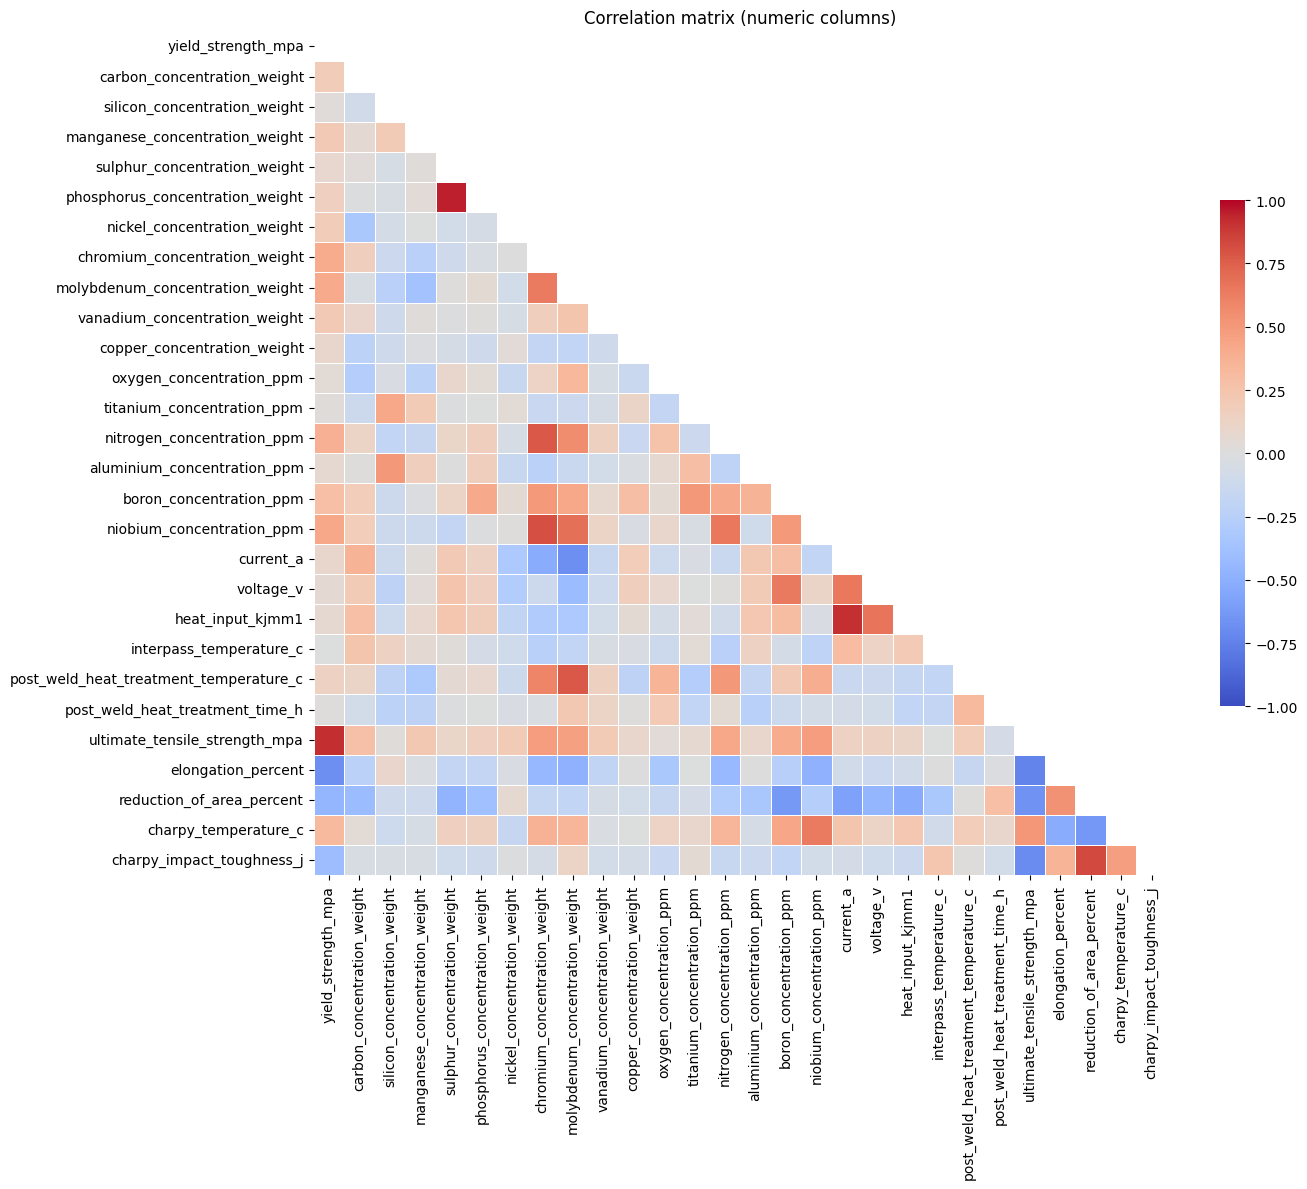

In [77]:

# Compute and display correlation matrix for numeric columns, with a heatmap
correlation_matrix(processed_df, target_col = 'yield_strength_mpa')

In [78]:
complete_df = processed_df.copy()
processed_df,dropped_columns = drop_not_chosen_target(processed_df, threshold=0.4)
print("\n === Columns dropped when checking the correlation between the features===")
print(dropped_columns)


 === Columns dropped when checking the correlation between the features===
['manganese_concentration_weight', 'nickel_concentration_weight', 'vanadium_concentration_weight', 'copper_concentration_weight', 'oxygen_concentration_ppm', 'interpass_temperature_c', 'post_weld_heat_treatment_time_h']


In [79]:
complete_df.head()

,carbon_concentration_weight,silicon_concentration_weight,manganese_concentration_weight,sulphur_concentration_weight,phosphorus_concentration_weight,nickel_concentration_weight,chromium_concentration_weight,molybdenum_concentration_weight,vanadium_concentration_weight,copper_concentration_weight,...,interpass_temperature_c,weld_type,post_weld_heat_treatment_temperature_c,post_weld_heat_treatment_time_h,yield_strength_mpa,ultimate_tensile_strength_mpa,elongation_percent,reduction_of_area_percent,charpy_temperature_c,charpy_impact_toughness_j
0,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,200.0,MMA,250.0,14.0,392.0,466.0,31.9,80.6,NaN,NaN
1,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,200.0,MMA,0.0,0.0,NaN,NaN,NaN,NaN,-28.0,100.0
2,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,200.0,MMA,580.0,2.0,370.0,456.0,35.2,80.6,-38.0,100.0
3,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,200.0,MMA,250.0,14.0,413.0,498.0,31.2,80.6,NaN,NaN
4,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,200.0,MMA,0.0,0.0,NaN,NaN,NaN,NaN,-48.0,100.0


## 4. Advanced feature preparation
Once the data is cleaned, more complex pre-processing tasks are performed to optimize the dataset for machine learning models. These include:
- Feature engineering (to be documented following a literature review)
- Data splitting
- Outlier management
- One-hot encoding
- Imputation and scaling
- Handling multicollinearity and applying PCA when relevant

### a. Feature engineering


Yield strength represents the stress at which a material begins to deform plastically (end of elastic region).   
It is chosen as the target because:
- Fewest missing values among mechanical properties
- Critical for structural design and safety assessment
- Direct indicator of load-bearing capacity
- Highly correlated with other physical properties (only one chosen to avoid redundancy)

> **The following features are engineered as they are commonly used by the industry.**

**Carbon Equivalent (CE)** `ce_iww`  

Formula: `CE = C + Mn/6 + (Cr+Mo+V)/5 + (Ni+Cu)/15`  
Explanation:
- Synthesizes the combined hardenability effect of all alloying elements
- Higher CE -> Harder microstructure -> Higher yield strength (but increased brittleness risk)
- Industry-standard metric (IIW, AWS D1.1)

**!!** Contains elements with high NaN rates (Cr, Mo, V, Ni, Cu)

**Carbon Squared (C²)** `carbon_squared`  

Explanation:
- Carbon has a nonlinear effect on yield strength
- Small delta C -> Large deltaYield Strength at high C levels
- Captures threshold effects and embrittlement beyond ~0.25% C  
Physical basis: Carbon interstitial atoms cause lattice distortion (strengthening), but excess C forms carbides (brittleness)

**C/Mn Ratio** `mn_c_ratio`  

Explanation:
- High C/Mn -> High strength, low ductility (carbon-dominated)
- Low C/Mn -> Moderate strength, high ductility (manganese-dominated)
- Balances solid-solution strengthening (Mn) vs. interstitial strengthening (C)

**Arc Energy (Voltage × Current)** `arc_energy`   

Formula: `Arc_energy = Voltage × Current [Watts]`

Explanation:  
- Proxy for heat input intensity
- High arc energy -> Coarser grain structure -> Lower yield strength
- Optimal energy window exists for maximum strength


**HAZ Hardness Estimate** `haz_hardness`  

Formula: `HAZ_hardness = 90 + 1050*C + 45*Si + 30*Mn + 25*Ni + 20*Cr + 60*Cr + 60Mo + 5HI`

Explanation:  
- Heat-Affected Zone hardness correlates strongly with yield strength
- Captures microstructural hardening from composition
- Simplified to avoid NaN-prone elements (Ni, Cr, Mo removed)

Physical basis: Düren formula for predicting HAZ properties

**!!!** Uses elements like Nickel, Chromium, and Molybdenum with many NaN values.

**Mn/S Ratio** `mn_s_ratio`    

Formula: `Mn_S_ratio = Mn / (S + 0.0001)`

Explanation: 
- Sulfur forms brittle MnS inclusions -> Crack initiation sites
- High Mn/S -> Fewer harmful inclusions -> Higher ductility AND yield strength

Metallurgical principle: Manganese "neutralizes" sulfur by forming less harmful inclusion morphology

**Austenite Stabilizer Index (Robust)** `austenite_stabilizer`  

Formula: `Austenite_stabilizer = Mn/2 + 10*C + Ni` 

Explanation: 
- Austenite -> Ductile, strong microstructure (vs. brittle ferrite)
- Higher index -> More retained austenite -> Better toughness-strength balance  

**!!!** Uses Nickel with high NaN rates.



In [80]:
augmented_df = add_features(complete_df)
augmented_df.head()

,carbon_concentration_weight,silicon_concentration_weight,manganese_concentration_weight,sulphur_concentration_weight,phosphorus_concentration_weight,nickel_concentration_weight,chromium_concentration_weight,molybdenum_concentration_weight,vanadium_concentration_weight,copper_concentration_weight,...,reduction_of_area_percent,charpy_temperature_c,charpy_impact_toughness_j,ce_iww,carbon_squared,mn_c_ratio,arc_energy,haz_hardness,mn_s_ratio,austenite_stabilizer
0,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,80.6,NaN,NaN,NaN,0.001369,17.567093,3570.0,166.85,81.239845,0.695
1,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,NaN,-28.0,100.0,NaN,0.001369,17.567093,3570.0,166.85,81.239845,0.695
2,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,80.6,-38.0,100.0,NaN,0.001369,17.567093,3570.0,166.85,81.239845,0.695
3,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,80.6,NaN,NaN,NaN,0.001369,27.837085,3570.0,178.70,147.121840,0.885
4,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,NaN,-48.0,100.0,NaN,0.001369,27.837085,3570.0,178.70,147.121840,0.885


Numeric columns used for correlation: ['yield_strength_mpa', 'carbon_concentration_weight', 'silicon_concentration_weight', 'manganese_concentration_weight', 'sulphur_concentration_weight', 'phosphorus_concentration_weight', 'nickel_concentration_weight', 'chromium_concentration_weight', 'molybdenum_concentration_weight', 'vanadium_concentration_weight', 'copper_concentration_weight', 'oxygen_concentration_ppm', 'titanium_concentration_ppm', 'nitrogen_concentration_ppm', 'aluminium_concentration_ppm', 'boron_concentration_ppm', 'niobium_concentration_ppm', 'current_a', 'voltage_v', 'heat_input_kjmm1', 'interpass_temperature_c', 'post_weld_heat_treatment_temperature_c', 'post_weld_heat_treatment_time_h', 'ultimate_tensile_strength_mpa', 'elongation_percent', 'reduction_of_area_percent', 'charpy_temperature_c', 'charpy_impact_toughness_j', 'ce_iww', 'carbon_squared', 'mn_c_ratio', 'arc_energy', 'haz_hardness', 'mn_s_ratio', 'austenite_stabilizer']
                                        

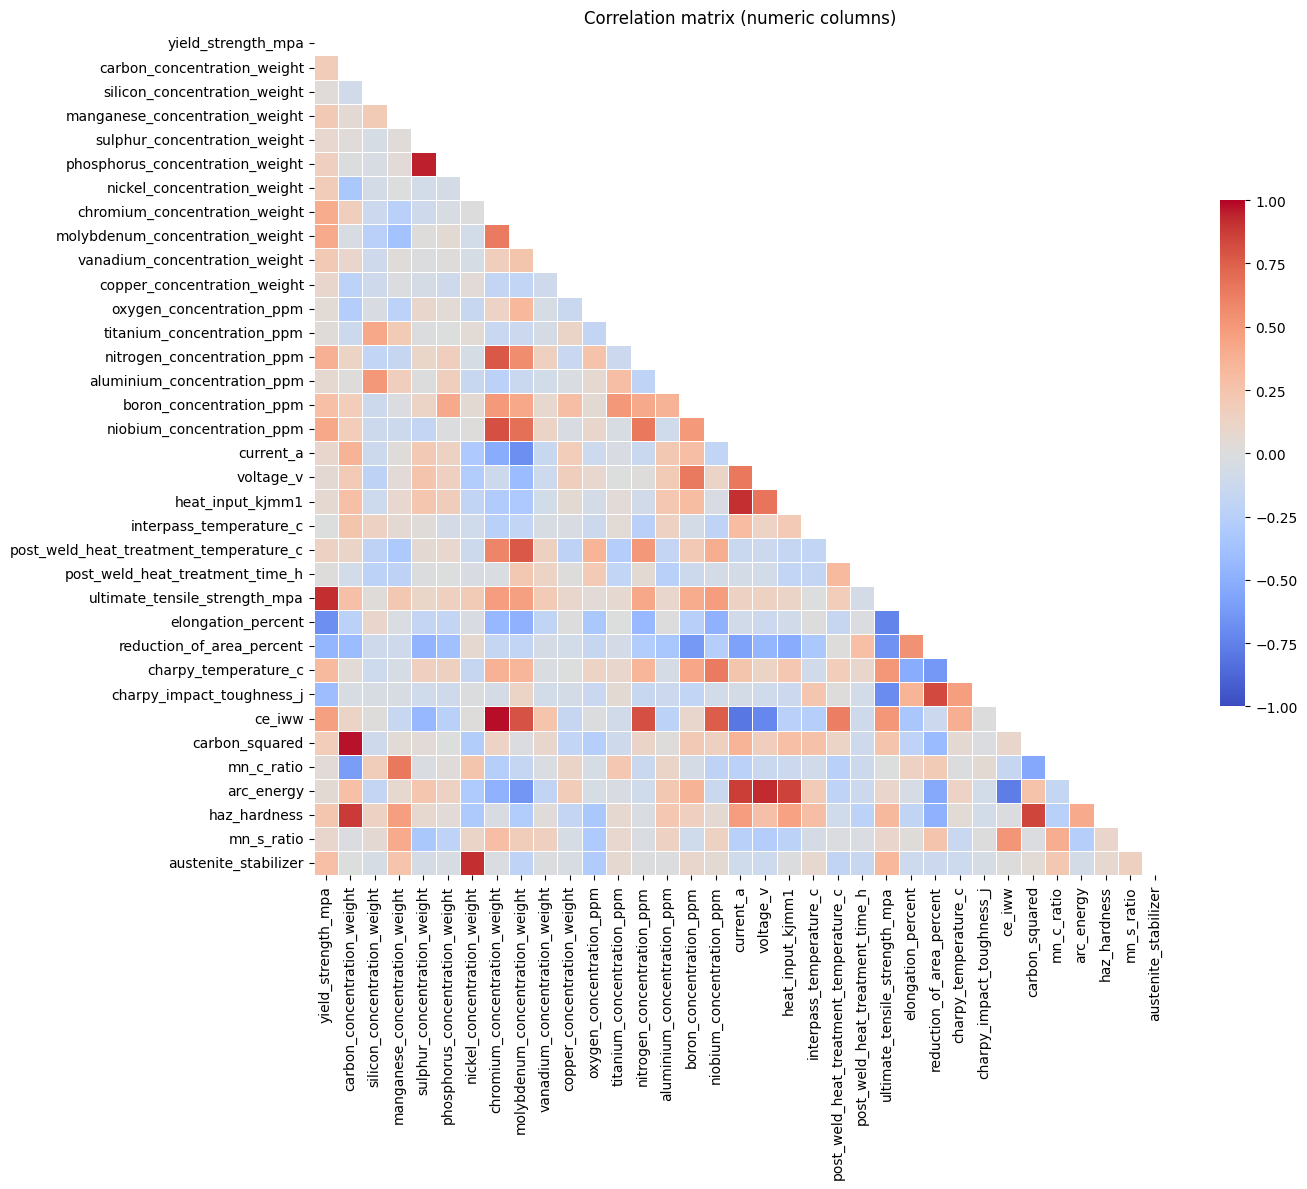

In [81]:
##New correleration matrix after feature engineering
correlation_matrix(augmented_df, target_col = 'yield_strength_mpa')

### b. Data splitting

To properly train and evaluate our model for predicting Yield Strength, we split the dataset into:

- Training set (80%): used to fit the model parameters
- Test set (20%): reserved for final evaluation

In [82]:
#see utils file for function details
X_train, X_test, y_train, y_test = split_data(augmented_df, random_state=42) #random state fixed for reproducibility

### c. Outlier management

We first visualized the univariate distributions (box/percentile plots). There are few extremes, so we apply light winsorization on a small set of numeric predictors: cap at the 0.5th / 99.5th percentiles, thresholds fitted on the training set only and then applied to test.

Why this choice? 
- Reduces leverage of rare extremes on linear models. -> Prevents single points from dominating the fit.
- Preserves all observations.
- Simple, interpretable baseline; thresholds fitted on X_train only.

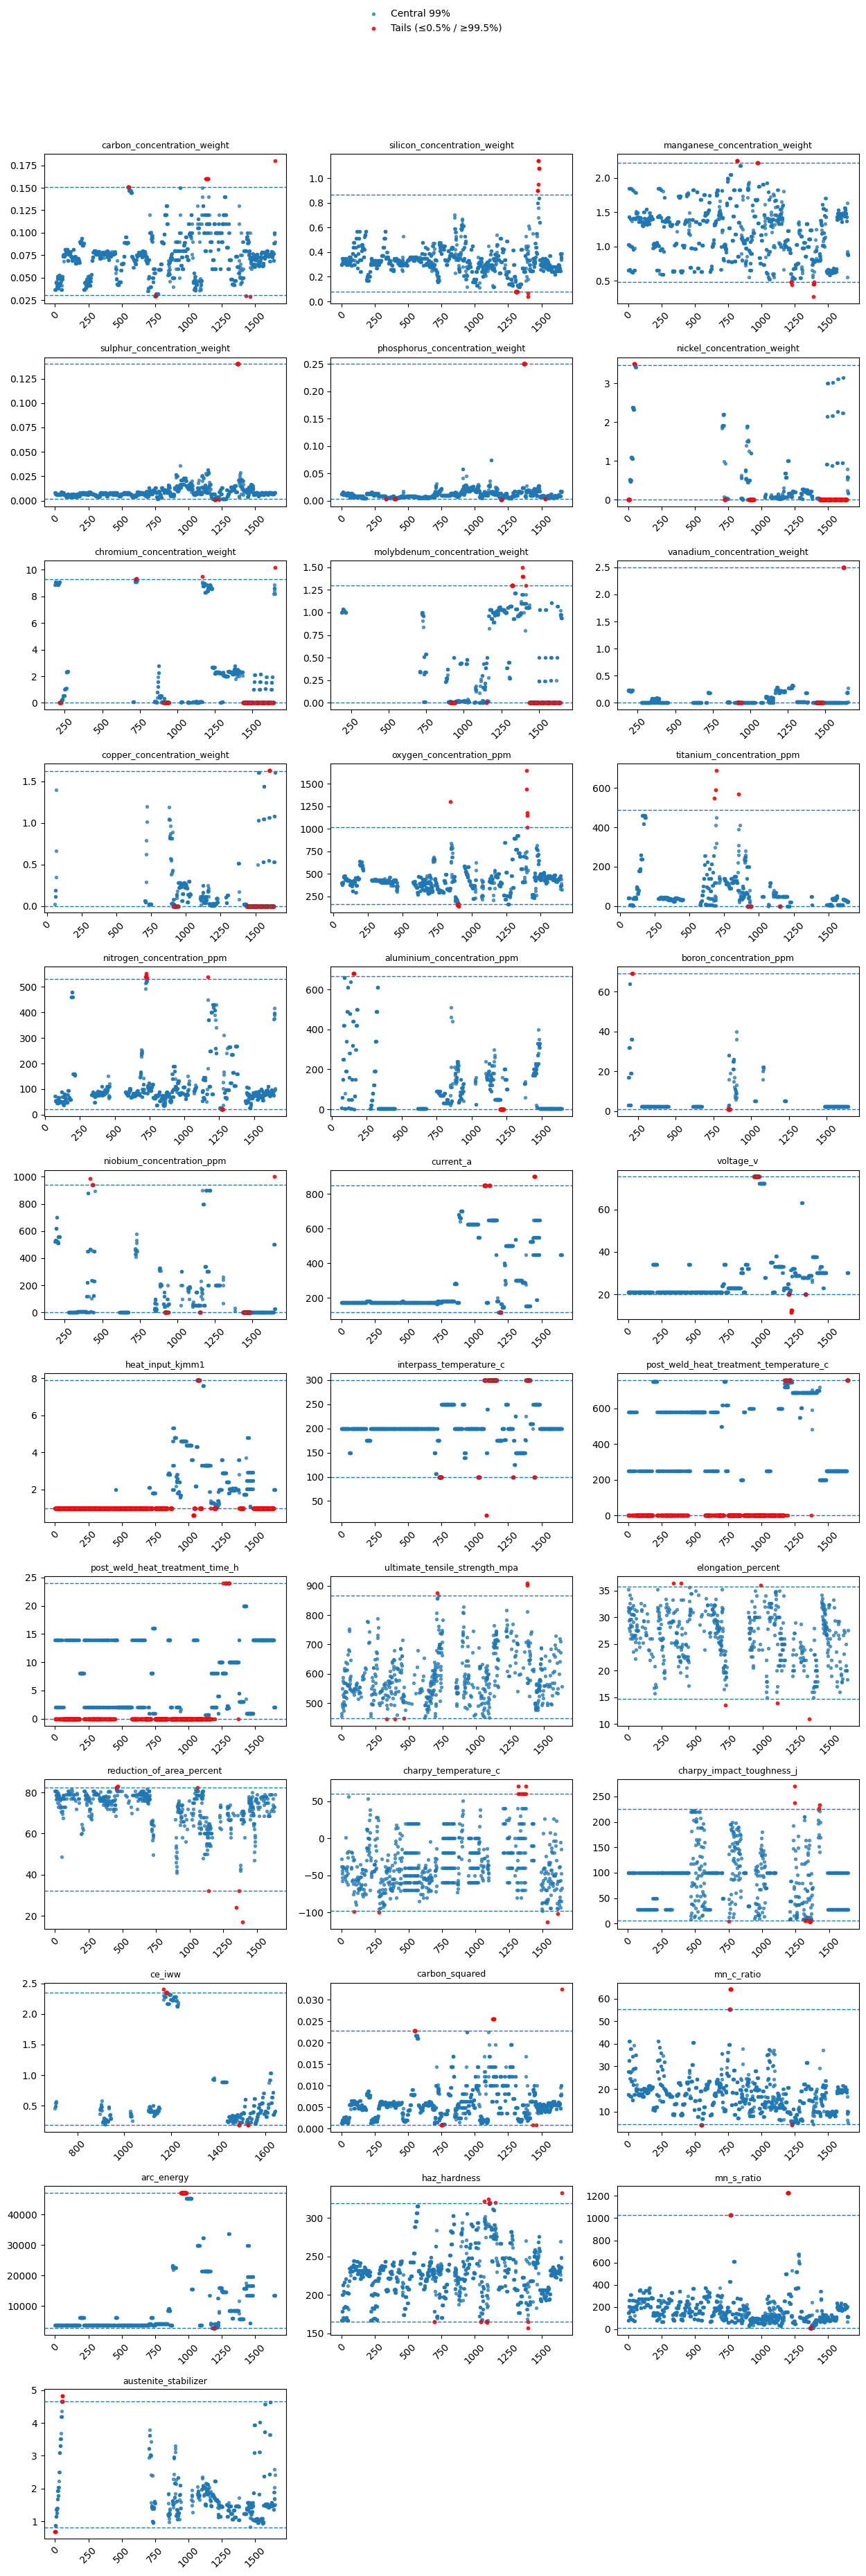

In [83]:
viz_outliers(X_train)

In [84]:
X_train_no_outlier, X_test_no_outlier = winsorize_columns(X_train, X_test, cols=['carbon_concentration_weight', 'silicon_concentration_weight',
                                    'manganese_concentration_weight', 'sulphur_concentration_weight', 'phosphorus_concentration_weight',
                                                           'vanadium_concentration_weight', 'carbon_squared',
                                                           'mn_c_ratio', 'mn_s_ratio', 'austenite_stabilizer'])

### d. One-hot encoding

In [85]:
# the columns to encode
non_num_cols = X_train.select_dtypes(exclude='number').columns
print(list(non_num_cols))

['ac_or_dc', 'electrode_polarity', 'weld_type']


In [86]:
X_train_oh, X_test_oh = one_hot_train_test(X_train_no_outlier, X_test_no_outlier)

Categorical columns ['ac_or_dc', 'electrode_polarity', 'weld_type']
Numerical columns ['carbon_concentration_weight', 'silicon_concentration_weight', 'manganese_concentration_weight', 'sulphur_concentration_weight', 'phosphorus_concentration_weight', 'nickel_concentration_weight', 'chromium_concentration_weight', 'molybdenum_concentration_weight', 'vanadium_concentration_weight', 'copper_concentration_weight', 'oxygen_concentration_ppm', 'titanium_concentration_ppm', 'nitrogen_concentration_ppm', 'aluminium_concentration_ppm', 'boron_concentration_ppm', 'niobium_concentration_ppm', 'current_a', 'voltage_v', 'heat_input_kjmm1', 'interpass_temperature_c', 'post_weld_heat_treatment_temperature_c', 'post_weld_heat_treatment_time_h', 'ultimate_tensile_strength_mpa', 'elongation_percent', 'reduction_of_area_percent', 'charpy_temperature_c', 'charpy_impact_toughness_j', 'ce_iww', 'carbon_squared', 'mn_c_ratio', 'arc_energy', 'haz_hardness', 'mn_s_ratio', 'austenite_stabilizer']
Columns after 

In [87]:
X_train_oh.head()

,carbon_concentration_weight,silicon_concentration_weight,manganese_concentration_weight,sulphur_concentration_weight,phosphorus_concentration_weight,nickel_concentration_weight,chromium_concentration_weight,molybdenum_concentration_weight,vanadium_concentration_weight,copper_concentration_weight,...,weld_type_FCA,weld_type_GMAA,weld_type_GTAA,weld_type_MMA,weld_type_NGGMA,weld_type_NGSAW,weld_type_SA,weld_type_SAA,weld_type_ShMA,weld_type_TSA
306,0.076,0.37,1.36,0.005,0.009,NaN,NaN,NaN,0.00025,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
192,0.091,0.20,1.04,0.007,0.013,NaN,9.02,1.01,0.24000,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
309,0.076,0.37,1.36,0.005,0.009,NaN,NaN,NaN,0.00025,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1360,0.074,0.27,1.11,0.009,0.024,0.17,2.30,0.96,0.01800,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.074,0.32,1.42,0.008,0.007,NaN,NaN,NaN,NaN,0.19,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### e. Imputation and scaling


Let's take a look on missing values:

In [88]:
print(((X_train_oh.isna().mean() * 100).sort_values(ascending=False)))

ce_iww                                    74.110522
boron_concentration_ppm                   70.022710
copper_concentration_weight               64.572294
elongation_percent                        58.137774
reduction_of_area_percent                 57.986374
austenite_stabilizer                      56.850871
nickel_concentration_weight               56.850871
ultimate_tensile_strength_mpa             55.412566
niobium_concentration_ppm                 54.428463
chromium_concentration_weight             52.081756
molybdenum_concentration_weight           51.324754
charpy_impact_toughness_j                 46.404239
charpy_temperature_c                      46.404239
aluminium_concentration_ppm               45.041635
titanium_concentration_ppm                44.208933
vanadium_concentration_weight             43.603331
nitrogen_concentration_ppm                27.706283
oxygen_concentration_ppm                  23.618471
arc_energy                                15.594247
current_a   

Imputation strategy: 

- **Mean imputation** for `sulphur_concentration_weight`, `phosphorus_concentration_weight`,
  `oxygen_concentration_ppm`, `mn_s_ratio`.  
   These are reasonably continuous with moderate missingness; the mean preserves scale and keeps derived ratios centered.

- **Zero imputation** for rare alloying elements:
  `nickel_concentration_weight`, `chromium_concentration_weight`, `molybdenum_concentration_weight`,
  `vanadium_concentration_weight`, `copper_concentration_weight`, `aluminium_concentration_ppm`,
  `boron_concentration_ppm`, `niobium_concentration_ppm`.  
  Missing often corresponds to *not intentionally added* or *below detection*. Filling with 0 encodes structural absence without fabricating concentrations.

- **Median imputation** for `titanium_concentration_ppm`, `nitrogen_concentration_ppm`.  
  Implemented with `SimpleImputer(strategy="median")`. Missingness is limited; zero would be too aggressive, so the median is a robust central choice.

- **Mode imputation** for process settings `current_a`, `voltage_v`, `arc_energy`, `post_weld_heat_treatment_temperature_c`, `post_weld_heat_treatment_time_h`.  
  These are typically discrete/programmed; the most frequent setting is a sensible default.

- **Model-based imputation (multivariate regression among the targets themselves)** for  
  `ultimate_tensile_strength_mpa`, `elongation_percent`, `reduction_of_area_percent`,
  `charpy_temperature_c`, `charpy_impact_toughness_j`.  
  These outcomes are strongly correlated, so each target can be predicted from the others. We train on rows where a given
  target is observed, using the remaining targets as predictors (with train medians to bridge occasional gaps), then fall back to the train median if needed.

- **Feature removal**: drop `ce_iww`, `austenite_stabilizer` before scaling.  
  These custom features have substantial missingness and are not required once targets are mutually imputed.




All imputers/models are fit on the **training set only**, then applied to the test set.

In [89]:
X_train_imp, X_test_imp = custom_impute_data(X_train_oh, X_test_oh)

 Remaining NaN — train: 0, test: 0.


Let's visualize the results of our imputation:

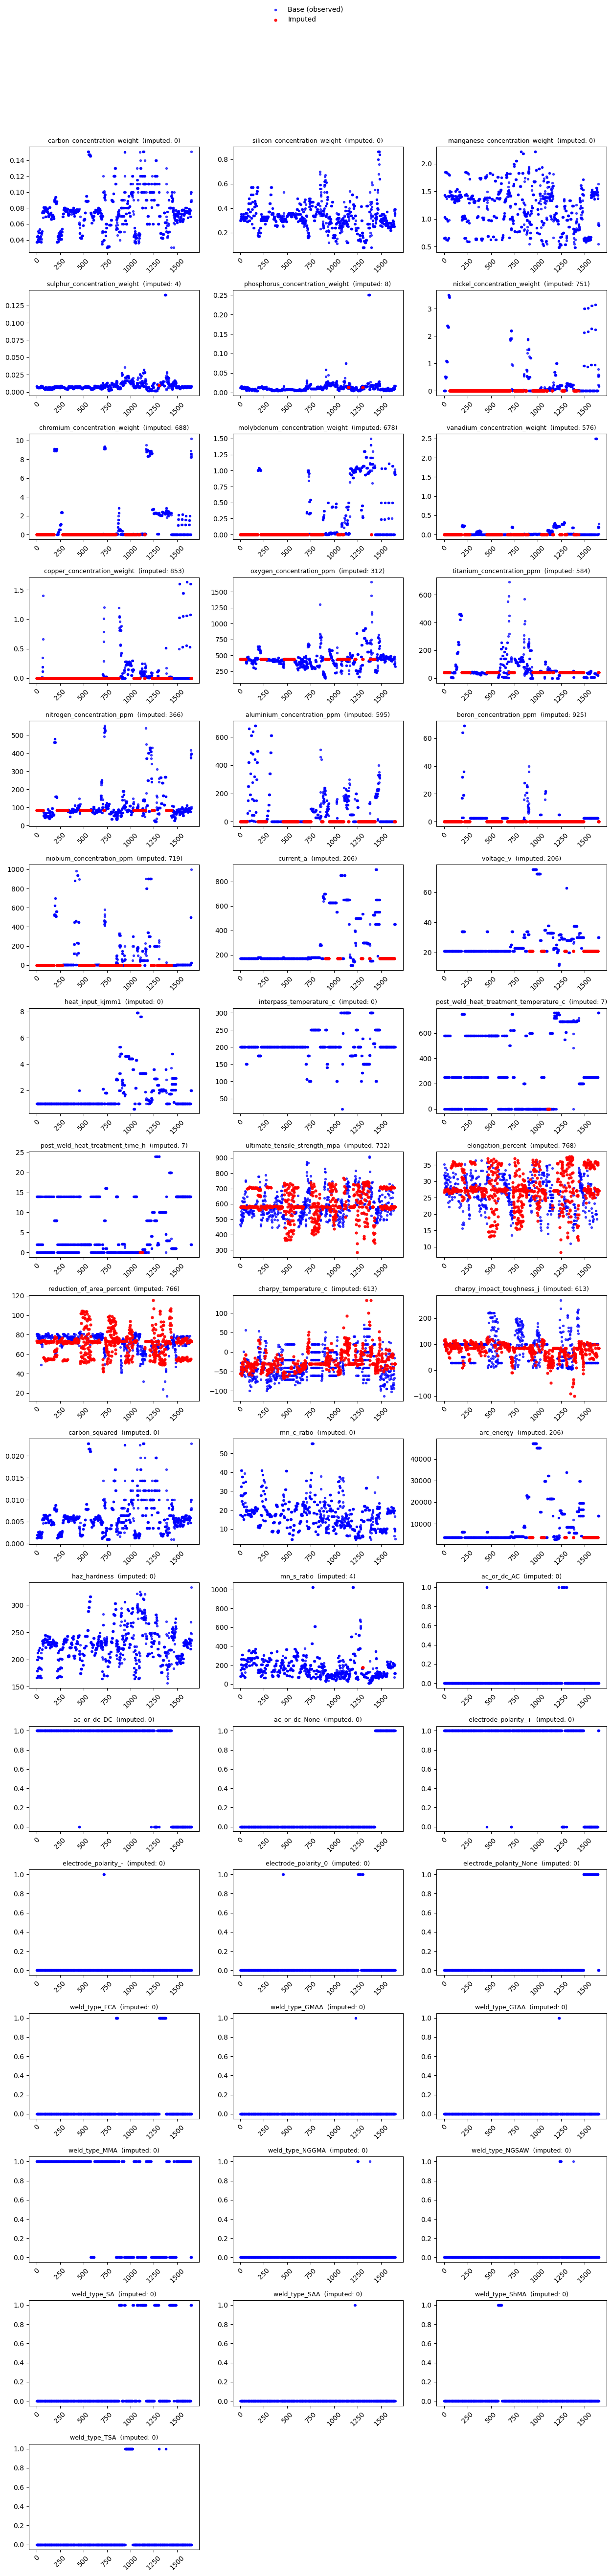

In [90]:
viz_imputed(X_train_oh, X_train_imp)   

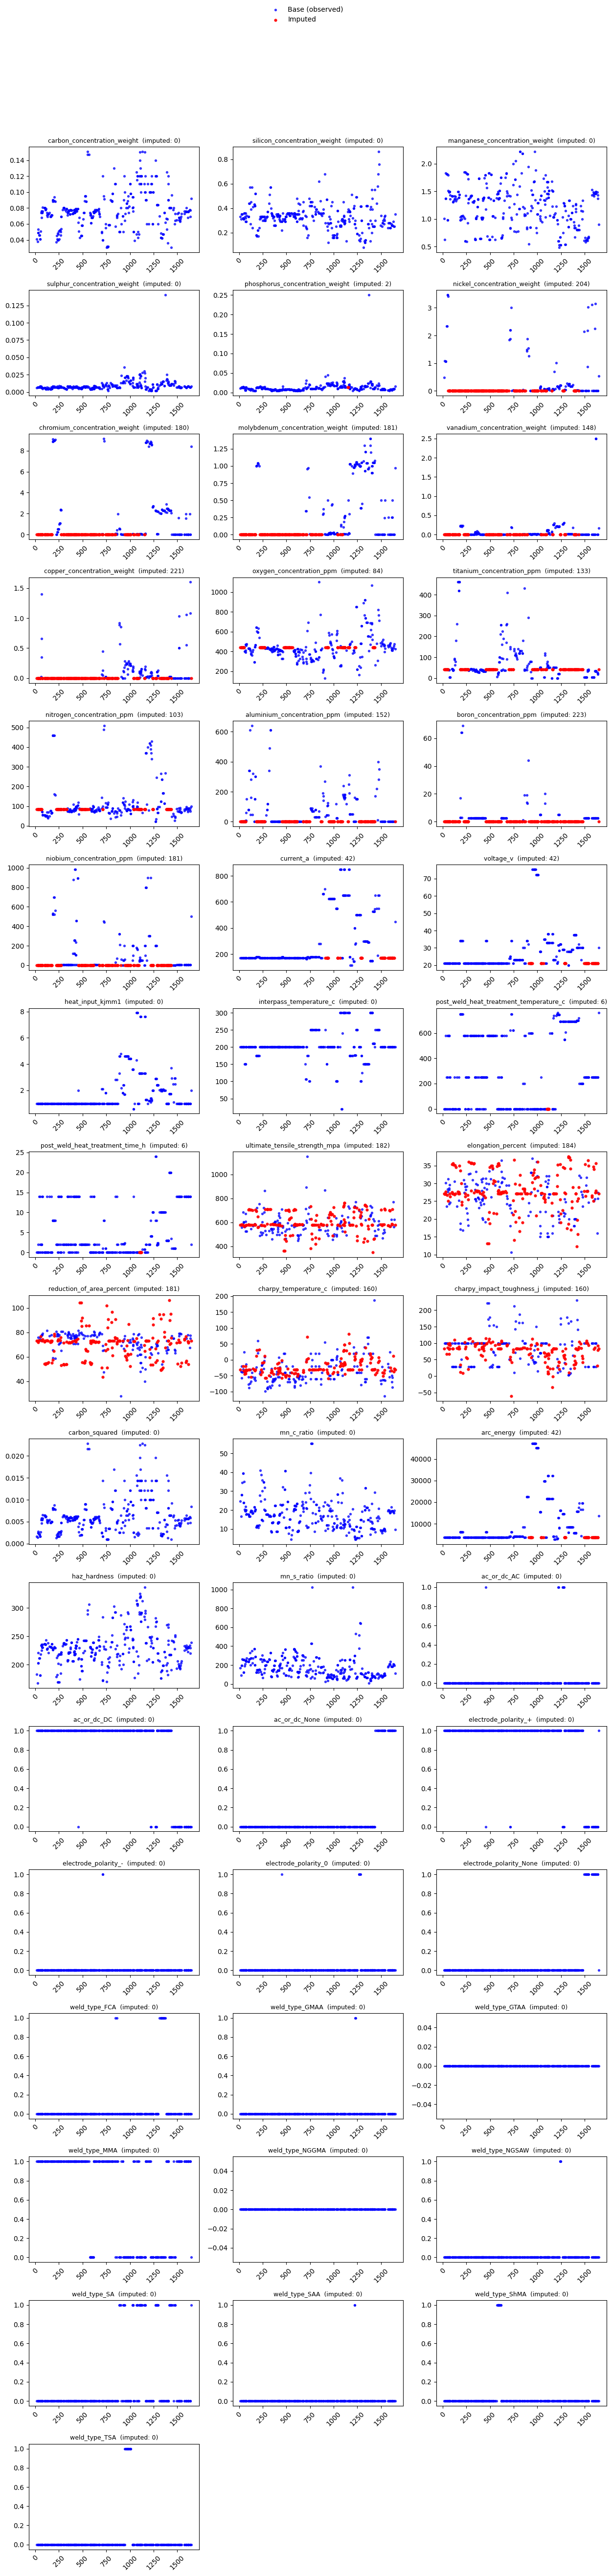

In [91]:
viz_imputed(X_test_oh, X_test_imp)  

In [92]:
X_train_scaled, X_test_scaled = scaling_data(X_train_imp, X_test_imp)

### f. Handling multicollinearity and PCA

Multicollinearity occurs when two or more predictor variables in a dataset are highly correlated, meaning they provide redundant information to the model. This can lead to unstable coefficients and reduce the interpretability of linear models.

To address this, we first quantify the degree of multicollinearity using correlation analysis and the Variance Inflation Factor (VIF). Highly correlated variables are either removed or combined (threshold = 0.9). If necessary, we apply **Principal Component Analysis (PCA)** to transform the dataset into a set of linearly uncorrelated components while preserving as much variance as possible.


In [93]:
X_train_col, X_test_col, dropped_columns = collinearity_management(X_train_scaled, X_test_scaled, threshold=0.9)
X_train_pca, X_test_pca,pca = pca(X_train_col, X_test_col, n_components=10)

Removed 6 features due to high collinearity (>0.9): ['phosphorus_concentration_weight', 'charpy_impact_toughness_j', 'carbon_squared', 'arc_energy', 'ac_or_dc_None', 'electrode_polarity_0']
PCA retained 10 components explaining 61.60% of total variance.


## 5. Data export

### a. Export of test and train datasets before PCA and multicollinearity

In [94]:
train_out = X_train_scaled.copy()
test_out  = X_test_scaled.copy()

#we add the feature back
train_out["yield_strength_mpa"] = y_train.reindex(train_out.index).values
test_out["yield_strength_mpa"]  = y_test.reindex(test_out.index).values

In [95]:
Path("preprocess_data").mkdir(parents=True, exist_ok=True)

In [96]:
train_out.to_csv("preprocess_data/train_processed.csv", index=False) 
test_out.to_csv("preprocess_data/test_processed.csv", index=False)

### b.Export of PCA test and train datasets

In [97]:
train_out_pca = X_train_pca.copy()
test_out_pca  = X_test_pca.copy()

#we add the feature back
train_out_pca["yield_strength_mpa"] = y_train.reindex(train_out_pca.index).values
test_out_pca["yield_strength_mpa"]  = y_test.reindex(test_out_pca.index).values

In [98]:
Path("preprocess_data").mkdir(parents=True, exist_ok=True)

In [99]:
train_out_pca.to_csv("preprocess_data/pca_train_processed.csv", index=False) 
test_out_pca.to_csv("preprocess_data/pca_test_processed.csv", index=False)

## Conclusion